In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [7]:
tdf = df.copy()

In [8]:
types = tdf.dtypes
num_columns = list(types[types != 'object'].index)
num_columns

['age', 'bmi', 'children', 'charges']

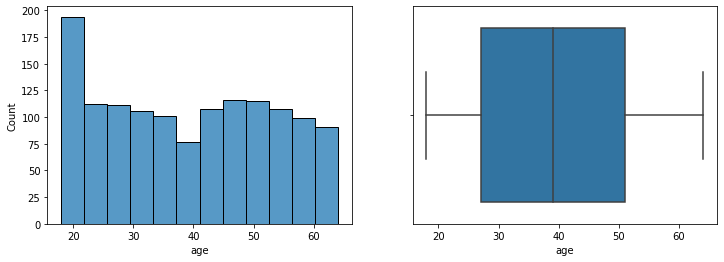

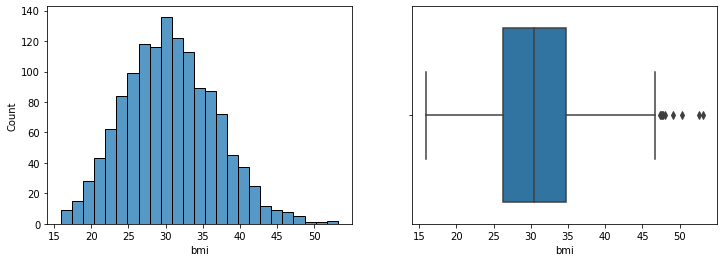

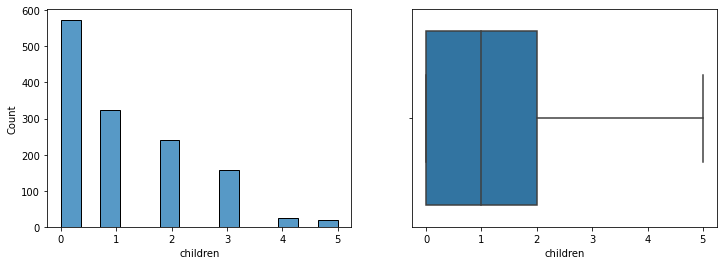

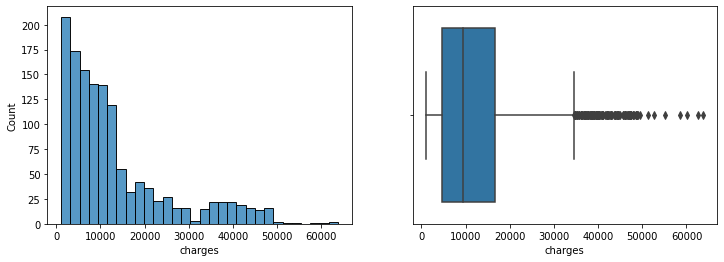

In [9]:
for column in num_columns:
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(data=tdf, x=column, ax=ax[0])
    sns.boxplot(data=tdf, x=column, ax=ax[1])
    

In [10]:
object_columns = list(types[types == 'object'].index)
object_columns

['sex', 'smoker', 'region']

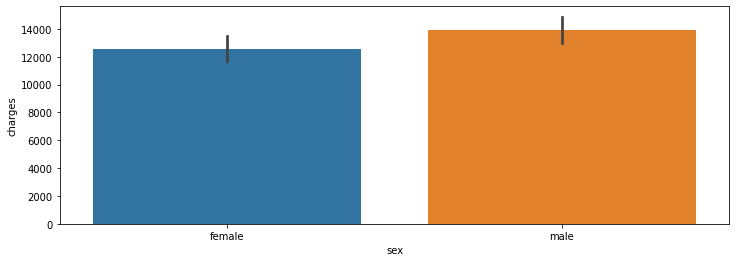

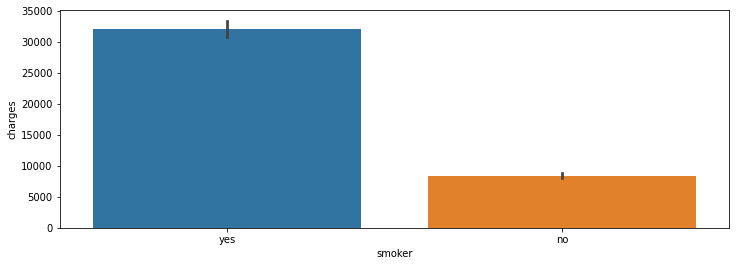

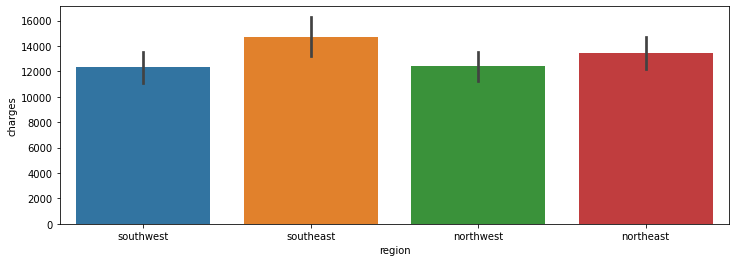

In [11]:
for column in object_columns:
    fig, ax = plt.subplots(figsize=(12,4))
    sns.barplot(data=tdf, x=column, y='charges', ax=ax)

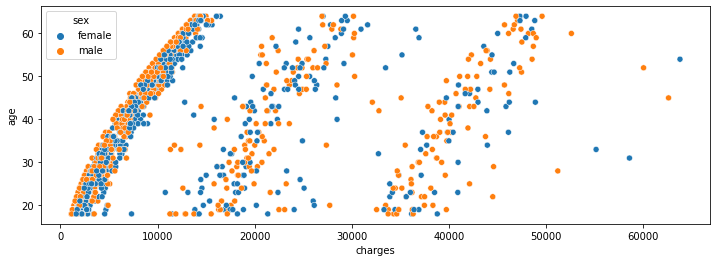

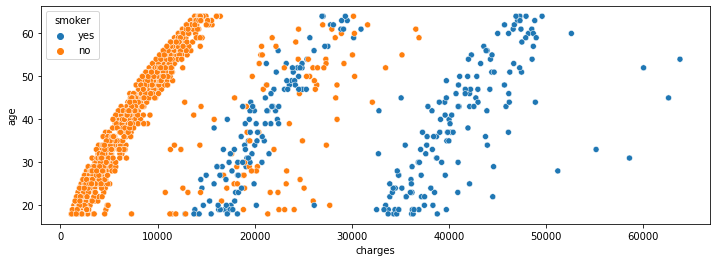

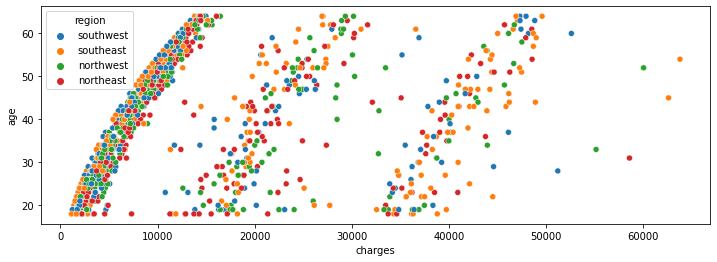

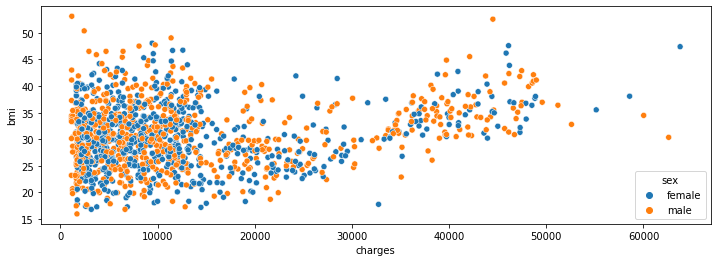

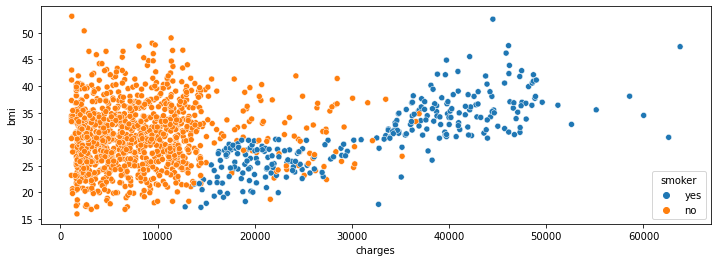

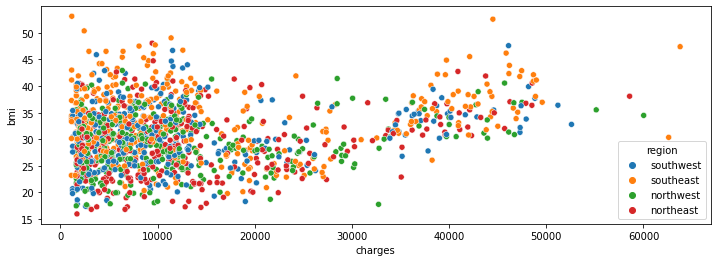

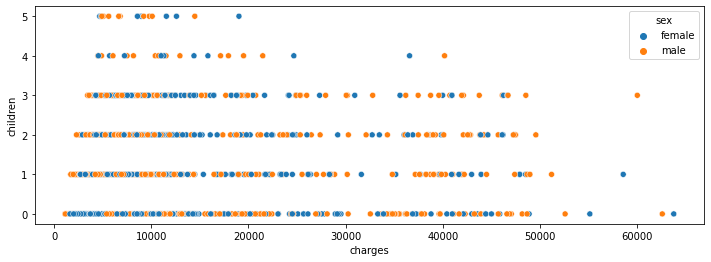

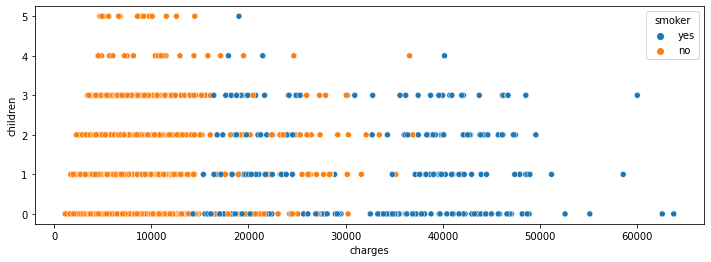

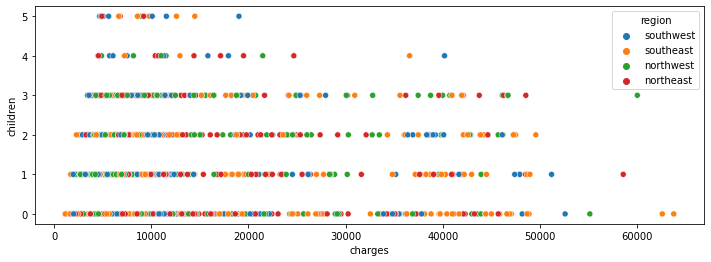

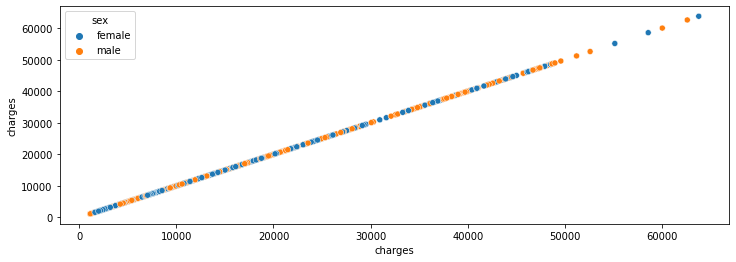

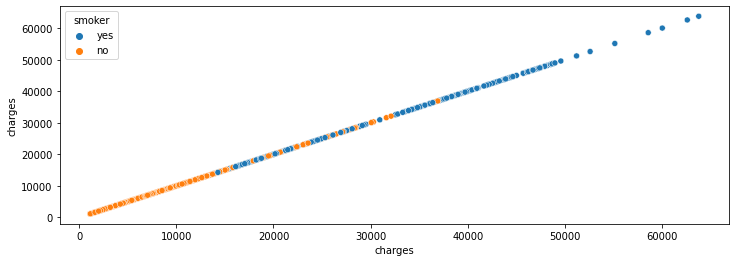

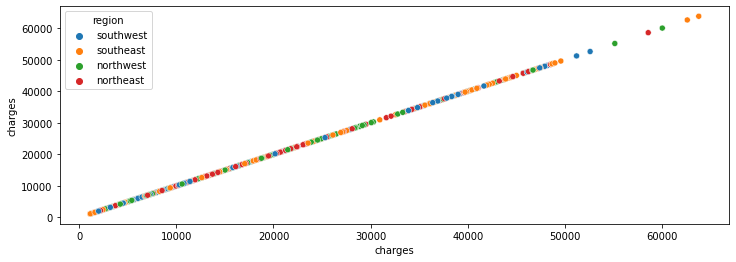

In [12]:
for column in num_columns:
    for o_column in object_columns:
        fig, ax = plt.subplots(figsize=(12,4))
        sns.scatterplot(data=tdf, x='charges', y=column, ax=ax, hue=o_column)

In [13]:
tdf['smoker'] = tdf['smoker'].apply(lambda val: 0 if val == 'no' else 1)
tdf['sex'] = tdf['sex'].apply(lambda val: 0 if val == 'female' else 1)

tdf = pd.get_dummies(tdf)
tdf.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [14]:
features = tdf.drop('charges', axis=1).columns
X = tdf[features]
y = tdf['charges']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)

(1070, 9)
(268, 9)


In [16]:
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
    print('Train MAE: {:.0f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
    print('Train MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_train, y_train_predict)*100))
    print('\n')
    print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
    print('Test MAE: {:.0f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
    print('Test MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

In [17]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

y_train_predict = lr.predict(X_train)
y_test_predict = lr.predict(X_test)

print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.742
Train MAE: 4208
Train MAPE: 42


Test R^2: 0.784
Test MAE: 4181
Test MAPE: 47


<AxesSubplot:>

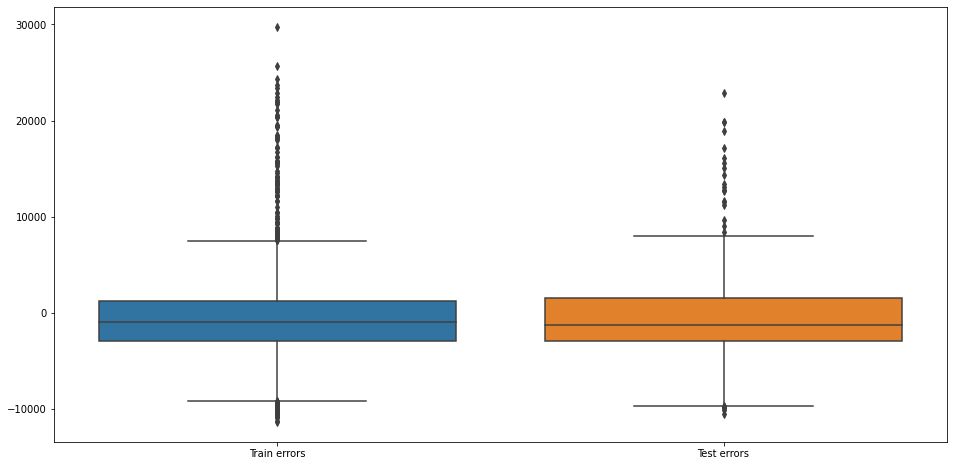

In [18]:
y_train_diff = y_train - y_train_predict
y_test_diff = y_test - y_test_predict

y_df = pd.DataFrame({
    'Train errors': y_train_diff,
    'Test errors': y_test_diff
})


fig, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(data=y_df, ax=ax)

In [19]:
X_train.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
560,46,0,19.95,2,0,0,1,0,0
1285,47,0,24.32,0,0,1,0,0,0
1142,52,0,24.86,0,0,0,0,1,0
969,39,0,34.32,5,0,0,0,1,0
486,54,0,21.47,3,0,0,1,0,0


In [20]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)

X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)

X_test_scaled_poly.shape


(268, 54)

In [22]:
lr = linear_model.LinearRegression()
lr.fit(X_train_scaled_poly, y_train)

y_train_predict = lr.predict(X_train_scaled_poly)
y_test_predict = lr.predict(X_test_scaled_poly)

print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.842
Train MAE: 2909
Train MAPE: 30


Test R^2: 0.866
Test MAE: 2742
Test MAPE: 31


In [23]:
lr_lasso = linear_model.Lasso(max_iter=10000)
lr_lasso.fit(X_train_scaled_poly, y_train)
y_train_predict = lr_lasso.predict(X_train_scaled_poly)
y_test_predict = lr_lasso.predict(X_test_scaled_poly)

print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.842
Train MAE: 2890
Train MAPE: 29


Test R^2: 0.867
Test MAE: 2719
Test MAPE: 30


In [24]:
lr_ridge = linear_model.Ridge(max_iter=10000)
lr_ridge.fit(X_train_scaled_poly, y_train)
y_train_predict = lr_ridge.predict(X_train_scaled_poly)
y_test_predict = lr_ridge.predict(X_test_scaled_poly)

print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.839
Train MAE: 2949
Train MAPE: 30


Test R^2: 0.863
Test MAE: 2861
Test MAPE: 31
